### panel vs clinvar pca by gene

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [79]:
panel_file = '../data/interim/epi/EPIv6.eff.dbnsfp.anno.hHack.dat.limit.xls'
clinvar_file = '../data/interim/clinvar_single/clinvar_single.limit3.dat'
panel = pd.read_csv(panel_file, sep='\t')
panel.loc[:, 'y'] = panel.apply(lambda row: 1 if row['class']=='P' else 0, axis=1)
panel.loc[:, 'is_domain'] = panel.apply(lambda row: 0 if 'none' in row else 1, axis=1)
panel.loc[:, 'key'] = panel.apply(lambda row: ':'.join([str(row[x]) for x in ('chrom', 'pos', 'ref', 'alt')]), axis=1)
panel_keys = set(panel['key'])
panel_genes = set(panel['gene'])
clinvar = pd.read_csv(clinvar_file, sep='\t').rename(columns={'clin_class':'y'})
clinvar.loc[:, 'is_domain'] = clinvar.apply(lambda row: 0 if 'none' in row else 1, axis=1)
clinvar.loc[:, 'key'] = clinvar.apply(lambda row: ':'.join([str(row[x]) for x in ('chrom', 'pos', 'ref', 'alt')]), axis=1)
clinvar_keys = set(clinvar['key'])

panel.loc[:, 'match_clinvar'] = panel.apply(lambda row: row['key'] in clinvar_keys, axis=1)
clinvar.loc[:, 'match_panel'] = clinvar.apply(lambda row: row['key'] in panel_keys, axis=1)
clinvar.loc[:, 'panel_gene'] = clinvar.apply(lambda row: row['gene'] in panel_genes, axis=1)

panel.loc[:, 'source'] = panel.apply(lambda row: 'both' if row['match_clinvar'] else 'panel', axis=1)
clinvar.loc[:, 'source'] = clinvar.apply(lambda row: 'both' if row['match_panel'] else 'clinvar', axis=1)

In [69]:
panel[panel.y==0].groupby('gene').size().reset_index().rename(columns={0:'size'}).sort_values(by='size', ascending=False)

,gene,size
48,TSC2,76
42,SPTAN1,45
47,TSC1,33
50,ZEB2,20
33,POLG,15
4,CHRNA4,12
10,CNTNAP2,12
24,KCNQ2,11
7,CLN5,9
3,CHRNA2,8


In [77]:
gene = 'TSC2'
panel_cols = ['ccr', 'revel', 'mpc', 'is_domain', 'y', 'source', 'gene']
clinvar_cols = ['ccr', 'revel', 'mpc', 'is_domain', 'y', 'source', 'gene']
df = pd.concat([panel[panel.gene==gene][panel_cols],
                clinvar[~clinvar.match_panel & (clinvar.gene==gene)][clinvar_cols]])

In [80]:
df = pd.concat([panel[panel_cols],
                clinvar[clinvar.panel_gene][clinvar_cols]])
df.groupby('y').size().reset_index().rename(columns={0:'size'}).sort_values(by='size', ascending=False)

,y,size
1,1,1018
0,0,716


In [81]:
df.groupby(['source', 'y']).size()

source   y
both     0    442
         1    544
clinvar  0    103
         1    257
panel    0    171
         1    217
dtype: int64

[  9.99602870e-01   2.97068764e-04]
1734


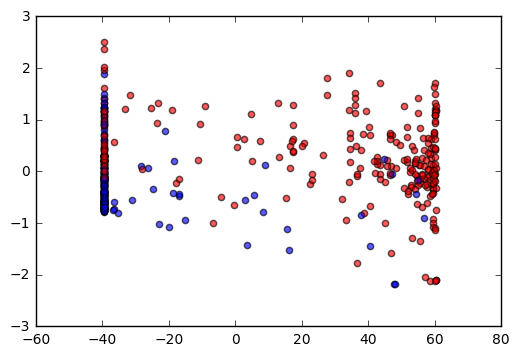

In [82]:
X = df[ panel_cols[:-2] ].values
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
p = pca.fit(X)
print(p.explained_variance_ratio_)

X_r = p.transform(X)
#.transform(X_std)
print(len(X_r))
names = df['source']
paths = df['y']

colors = {'panel':'red',
          'clinvar':'green',
          'both':'blue'}
path_color = {0:'blue', 1:'red'}
plt.figure()
for x_y, path, name in zip(X_r, paths, names):
    if name =='both':
        plt.scatter(x_y[0], x_y[1], alpha=.4, c=path_color[path], label=str(path))
    #plt.annotate(name, xy=(x_y[0], x_y[1]), xytext=(0,0), textcoords='offset points')

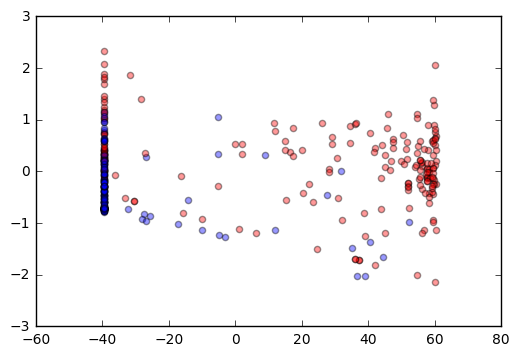

In [83]:
plt.figure()
for x_y, path, name in zip(X_r, paths, names):
    if name =='panel':
        plt.scatter(x_y[0], x_y[1], alpha=.4, c=path_color[path], label=str(path))

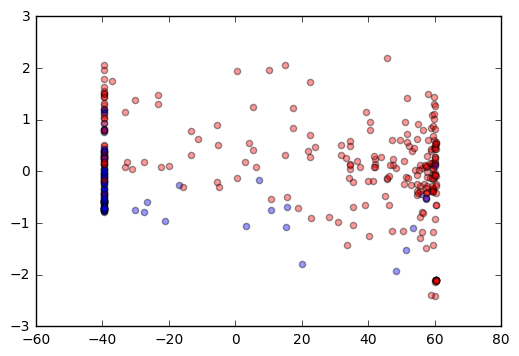

In [84]:
plt.figure()
for x_y, path, name in zip(X_r, paths, names):
    if name =='clinvar':
        plt.scatter(x_y[0], x_y[1], alpha=.4, c=path_color[path], label=str(path))